In [26]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import progressbar

In [34]:
data = pd.read_parquet('../Datos/chb03_raw_eeg_128.parquet')
data.filename.unique()

array(['chb03_01.edf', 'chb03_02.edf', 'chb03_03.edf', 'chb03_04.edf',
       'chb03_05.edf', 'chb03_06.edf', 'chb03_07.edf', 'chb03_08.edf',
       'chb03_09.edf', 'chb03_10.edf', 'chb03_11.edf', 'chb03_12.edf',
       'chb03_13.edf', 'chb03_14.edf', 'chb03_15.edf', 'chb03_16.edf',
       'chb03_17.edf', 'chb03_18.edf', 'chb03_19.edf', 'chb03_20.edf'],
      dtype=object)

In [36]:
230400/3600

64.0

In [35]:
data.query("filename == 'chb03_01.edf'")

FP1-F7      F7-T7      T7-P7      P7-O1     FP1-F3      F3-C3  \
0       42.002441  19.340660   6.056166 -14.261294  31.062271 -16.996338   
4        0.195360   0.195360   0.195360   0.195360   0.195360   0.195360   
8        1.758242  -0.586081   0.195360   0.586081   2.930403  -0.976801   
12      -7.228327  -2.539683 -16.996338  -3.321123 -12.698413  -2.930403   
16     -14.652015  -7.619048 -32.625153   3.711844 -11.526252  -4.884005   
...           ...        ...        ...        ...        ...        ...   
921580 -14.261294  35.750916  20.903542  22.075703  -2.539683  48.253967   
921584   0.195360  34.969475  20.122101  23.638584  38.876678  34.188034   
921588   5.274725  15.824176   3.711844  20.903542  45.128204  11.916972   
921592  14.261294  -6.446887  -5.274725  -5.274725  20.903542   2.539683   
921596  18.168499  -9.181930 -24.810745 -12.698413   9.963370 -12.698413   

            C3-P3      P3-O1     FP2-F4      F4-C4  ...      T8-P8      P8-O2  \
0       33.406593   5.665446   0.195360 -48.644688  ...   2.148962  -6.056166   
4        0.195360   0.195360   0.195360   0.195360  ...   0.195360   0.195360   
8        0.195360  -0.195360  -0.976801   0.976801  ...  -0.586081   1.367521   
12      -6.837607  -6.837607   3.711844 -10.744811  ...  -5.665446  -6.446887   
16     -15.042735 -18.559219   4.493285   4.102564  ...  -7.228327 -11.916972   
...           ...        ...        ...        ...  ...        ...        ...   
921580  18.168499   0.586081  22.075703   2.539683  ...  20.903542  25.201466   
921584   4.884005   0.195360  38.876678   7.619048  ...  31.843712  21.684982   
921588  -8.009768  -2.539683  18.559219  22.857143  ...  24.420025   7.228327   
921592 -16.605618  -9.963370 -20.903542  25.982906  ...   6.446887   0.586081   
921596 -11.916972 -14.261294  -8.400489   8.400489  ...  -0.586081   6.056166   

            FZ-CZ      CZ-PZ     T7-FT9   FT9-FT10    FT10-T8     type  PatID  \
0      -23.247864  26.764347  -5.665446 -10.354091 -13.089133  seizure  chb03   
4        0.195360   0.195360  -0.195360   0.195360   0.195360  seizure  chb03   
8        0.195360   0.195360  -0.976801   0.195360   1.758242  seizure  chb03   
12      -4.884005  -4.102564   2.539683   6.056166  -0.976801  seizure  chb03   
16      -0.586081  -7.619048   9.181930  10.354091   1.758242  seizure  chb03   
...           ...        ...        ...        ...        ...      ...    ...   
921580  24.420025  16.605618 -18.168499  -8.009768   0.976801  seizure  chb03   
921584  44.346764  -0.976801 -12.307693  -1.758242  10.354091  seizure  chb03   
921588  37.313797 -13.870574  -4.493285  -5.665446  19.340660  seizure  chb03   
921592  22.466423  -6.056166  -7.228327  -9.181930   9.572650  seizure  chb03   
921596   2.930403  -1.758242 -10.354091 -30.671551  -0.195360  seizure  chb03   

            filename  
0       chb03_01.edf  
4       chb03_01.edf  
8       chb03_01.edf  
12      chb03_01.edf  
16      chb03_01.edf  
...              ...  
921580  chb03_01.edf  
921584  chb03_01.edf  
921588  chb03_01.edf  
921592  chb03_01.edf  
921596  chb03_01.edf  

[230400 rows x 24 columns]

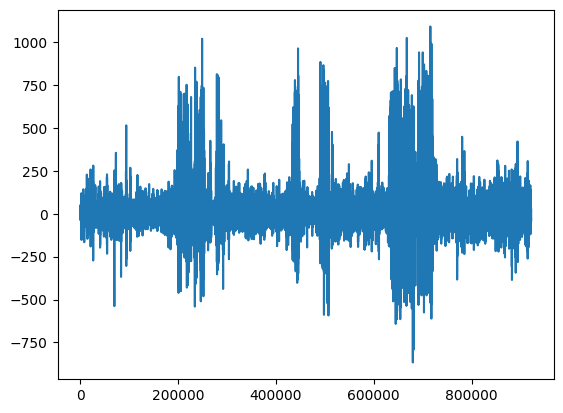

In [26]:
plt.plot(data.query("filename == 'chb02_01.edf'")['FP1-F7'])

In [16]:
115200/3600

32.0

In [26]:
3600*32

115200

## Creando la variable objetivo

0: Normal


1: PreEpilepsia


2: Epilepsia


3: PostEpilepsia

In [11]:
DataAnotation = pd.read_excel("../Datos/df_annotation_full.xlsx")
DataAnotation.head()

Unnamed: 0     type  PatID      filename  seizure_id  seizure_start  \
0           0   normal  chb01  chb01_01.edf           0              0   
1           1   normal  chb01  chb01_02.edf           0              0   
2           2  seizure  chb01  chb01_03.edf           1           2996   
3           3  seizure  chb01  chb01_04.edf           1           1467   
4           4   normal  chb01  chb01_05.edf           0              0   

   seizure_end  rec_duration  seizure_duration  
0            0          3600                 0  
1            0          3600                 0  
2         3036          3600                40  
3         1494          3600                27  
4            0          3600                 0

In [12]:
f = px.histogram(DataAnotation.query("seizure_duration > 0").seizure_duration)#, points="all")
f.update_layout(title = 'seizure_duration distribution')
f.show()

In [13]:
f = px.histogram(DataAnotation.query("rec_duration > 0"), x = 'rec_duration', color = 'type')
f.update_layout(title = 'rec_duration distribution')
f.show()

In [14]:
DataAnotation.type.describe()

count        743
unique         2
top       normal
freq         545
Name: type, dtype: object

In [15]:
f = px.bar(y = [743-545, 545], x = ['seizure', 'normal'])
f.update_layout(title = 'rec_duration distribution')
f.show()

In [16]:
DataAnotation.rec_duration.unique()

array([ 3600,  2663,  2325,   600,   959,  3606, 14398, 14400,  9536,
        7496,  4832, 14420, 14418, 13732, 14425, 10684, 14406, 14427,
       14423, 14403,  5613,  5823,  3610, 13261,  3030,  7928, 14411,
        4920,  4660,  3726, 12060,  3623,  8023, 14399, 14415, 14405,
       14421, 13591,   974,  5700,  7220,  7200,  7212,  7218,  7213,
        7221,  3598,  2859,  3612,  3611,  2431,  3624,  3616,  3602,
        3625,  3609,  2274,  3334,  3469,  3618,   742,  2964,  2167,
        3599,  2990,  7486,  2560, 10342, 14426, 12587,  5009,  1067],
      dtype=int64)

In [17]:
DataAnotation.head()

Unnamed: 0     type  PatID      filename  seizure_id  seizure_start  \
0           0   normal  chb01  chb01_01.edf           0              0   
1           1   normal  chb01  chb01_02.edf           0              0   
2           2  seizure  chb01  chb01_03.edf           1           2996   
3           3  seizure  chb01  chb01_04.edf           1           1467   
4           4   normal  chb01  chb01_05.edf           0              0   

   seizure_end  rec_duration  seizure_duration  
0            0          3600                 0  
1            0          3600                 0  
2         3036          3600                40  
3         1494          3600                27  
4            0          3600                 0

In [18]:
retrieve = {0:'normal', 1:'pre', 2:'seizure', 3:'pos'}
y = []
Ref = []
Seizure = []
Frec = 64
segMargin = 30 * Frec
for i in range(DataAnotation.shape[0]):
    filename = DataAnotation.iloc[i, :].filename
    Temp = DataAnotation.iloc[i, :]* Frec
    Vec = np.zeros(Temp.rec_duration, dtype = np.int32)
    Ref.append(filename)
    
    if Temp.seizure_duration > 0:
        Seizure.append(True)
        
        before = Temp.seizure_start - segMargin
        before = 0 if before < 0  else before
        
        Vec[before : Temp.seizure_start] = 1
        
        Vec[Temp.seizure_start:Temp.seizure_end] = 2
        
        after = Temp.seizure_end + segMargin + 1
        after = after if after <= Temp.rec_duration else Temp.rec_duration
        
        Vec[Temp.seizure_end +1 : after] = 3
        
    else:
        Seizure.append(False)
    
            
    y.append(Vec)

Ref = np.array(Ref)
Seizure = np.array(Seizure)

In [19]:
for r, c in zip(Ref[Seizure], np.where(np.array(Seizure) == True)[0]):
    print(r,c)

chb01_03.edf 2
chb01_04.edf 3
chb01_15.edf 14
chb01_16.edf 15
chb01_18.edf 17
chb01_21.edf 20
chb01_26.edf 25
chb02_16+.edf 57
chb02_16.edf 58
chb02_19.edf 61
chb03_01.edf 78
chb03_02.edf 79
chb03_03.edf 80
chb03_04.edf 81
chb03_34.edf 111
chb03_35.edf 112
chb03_36.edf 113
chb04_05.edf 120
chb04_08.edf 123
chb04_28.edf 142
chb04_28.edf 143
chb05_06.edf 164
chb05_13.edf 171
chb05_16.edf 174
chb05_17.edf 175
chb05_22.edf 180
chb06_01.edf 198
chb06_01.edf 199
chb06_01.edf 200
chb06_04.edf 203
chb06_04.edf 204
chb06_09.edf 209
chb06_10.edf 210
chb06_13.edf 212
chb06_18.edf 217
chb06_24.edf 218
chb07_12.edf 230
chb07_13.edf 231
chb07_19.edf 237
chb08_02.edf 238
chb08_05.edf 241
chb08_11.edf 243
chb08_13.edf 245
chb08_21.edf 253
chb09_06.edf 263
chb09_08.edf 265
chb09_08.edf 266
chb09_19.edf 277
chb10_12.edf 286
chb10_20.edf 294
chb10_27.edf 297
chb10_30.edf 299
chb10_31.edf 300
chb10_38.edf 301
chb10_89.edf 302
chb11_82.edf 335
chb11_92.edf 336
chb11_99.edf 337
chb12_06.edf 338
chb12_06.edf

In [20]:
ind = 57
#y[ind]
Ref[ind]

'chb02_16+.edf'

In [21]:
y[ind][y[ind] == 2].shape

(5184,)

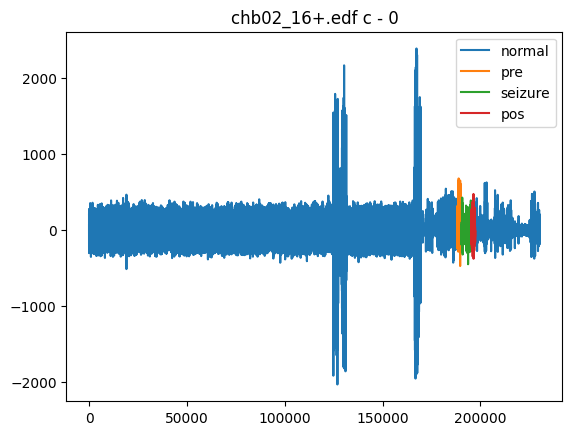

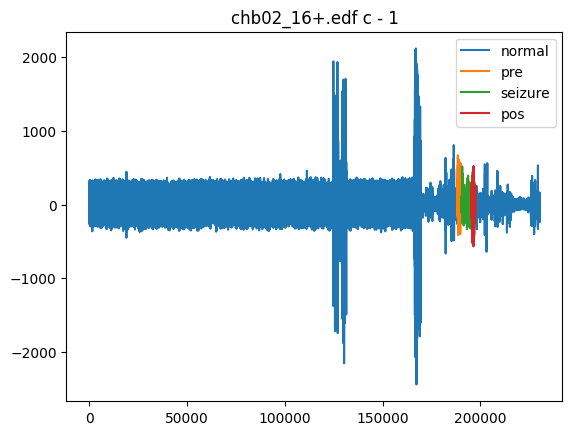

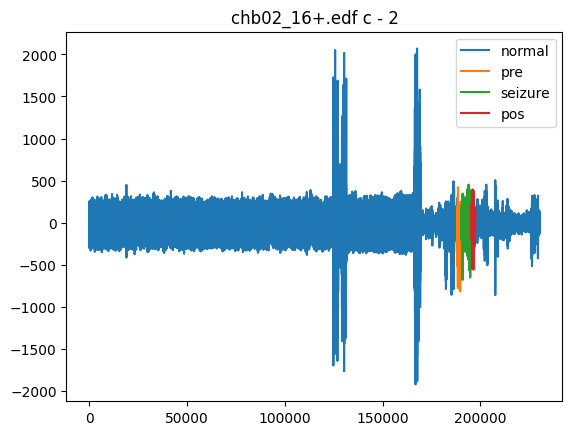

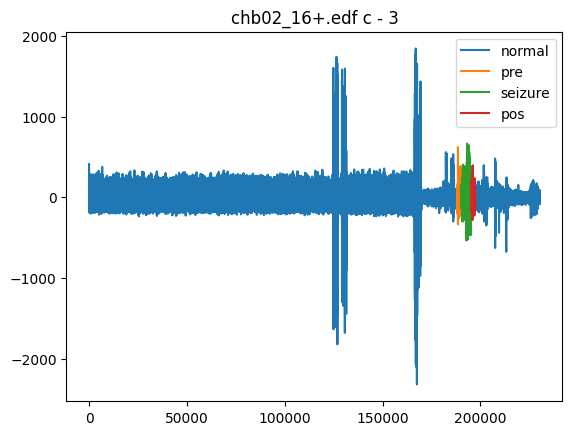

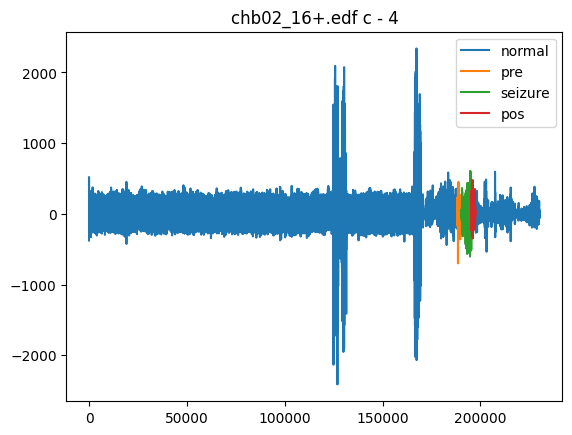

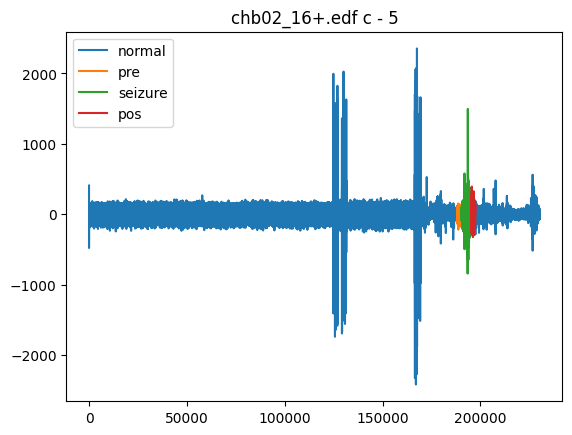

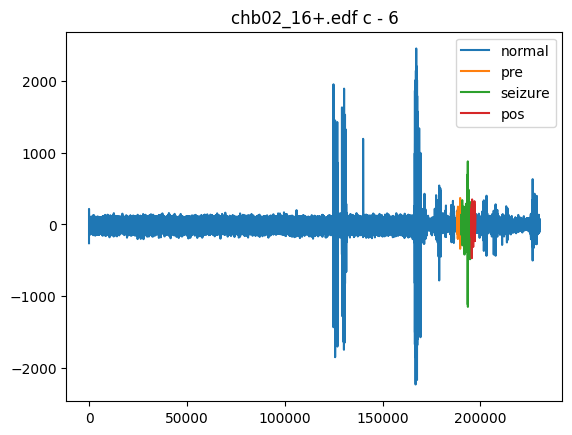

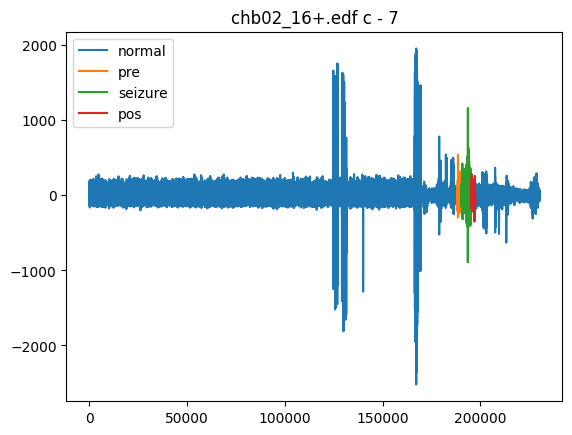

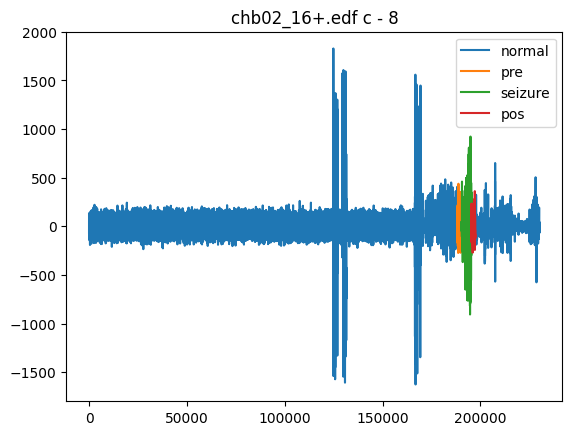

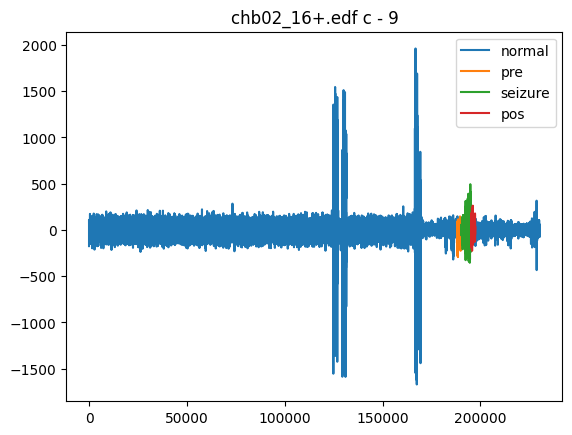

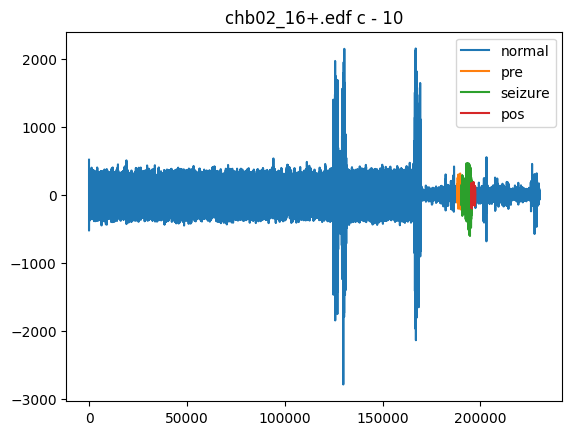

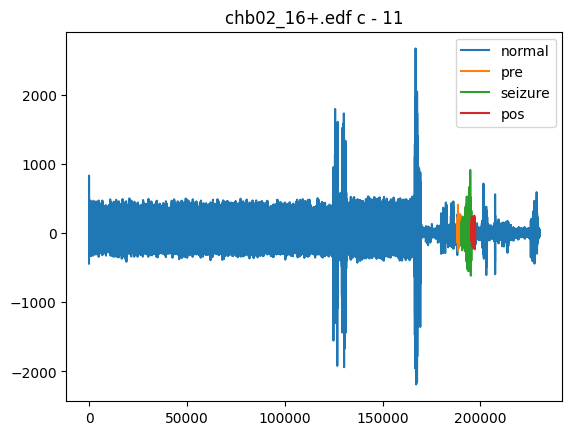

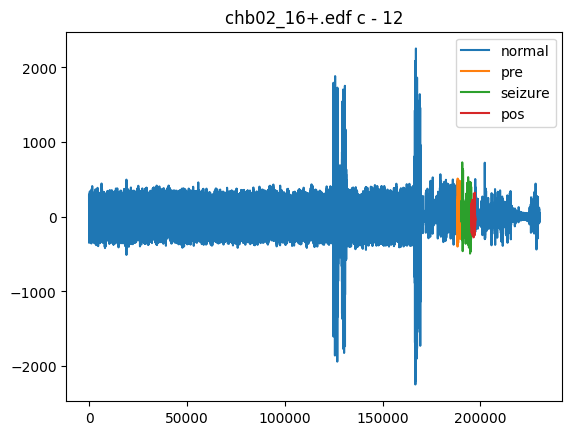

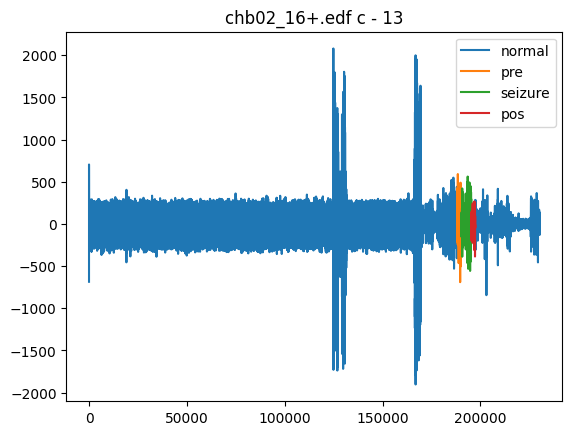

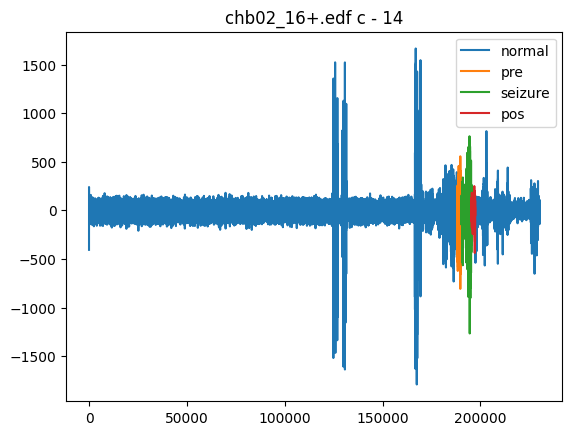

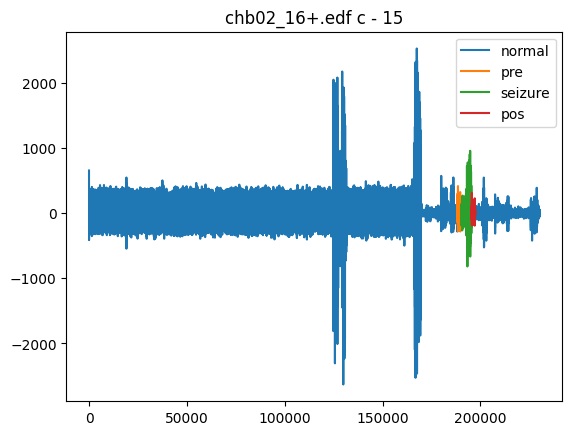

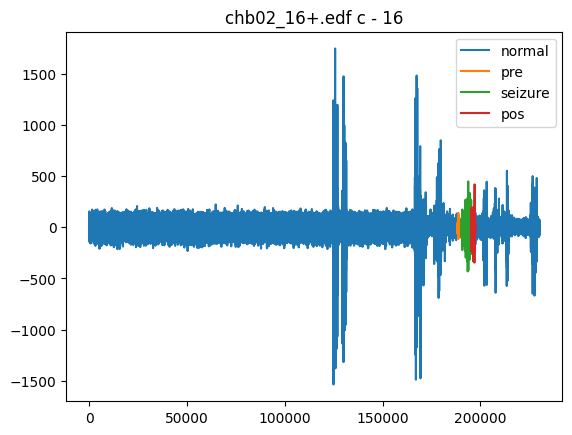

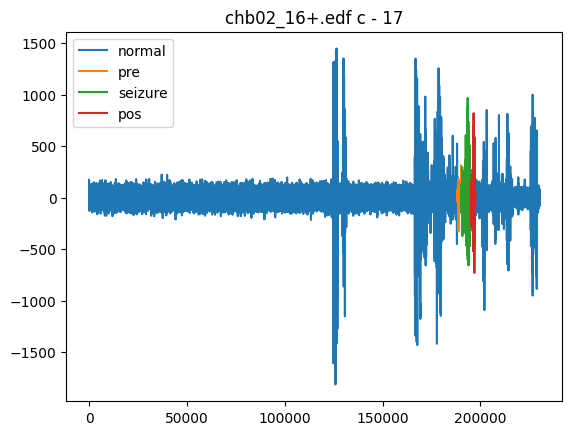

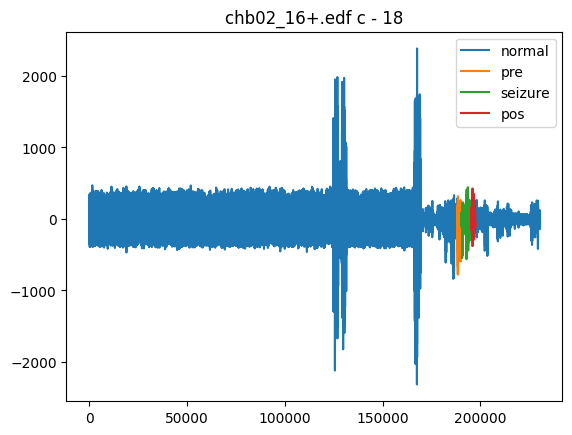

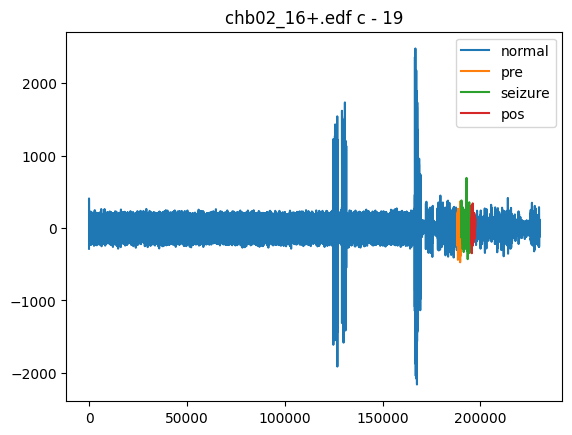

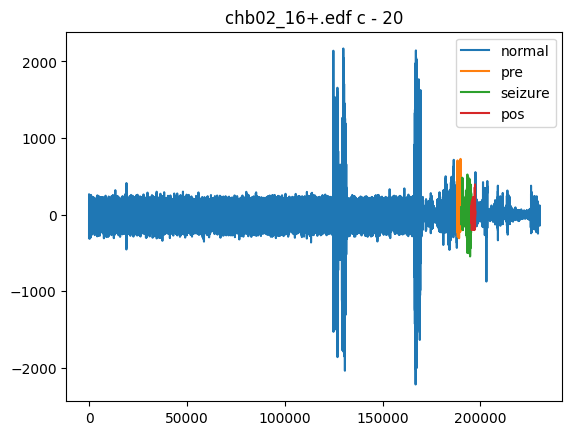

In [27]:
Paciente = 0
for channel in range(21):
    T = data.query(f"filename == '{Ref[ind]}'").iloc[:,channel]
    Types = y[ind]
    xrange = np.arange(0,T.shape[0], 1)

    for Type in np.unique(Types):
        Vec_type = [] # For type
        mask = y[ind] == Type
        plt.plot(xrange[mask], T[mask], label = f'{retrieve[Type]}')

        #Metricas(Vec[Paciente][retrieve[Type]], T[mask])

        #Vec.append(Vec_type)
    plt.legend()
    plt.title(f"{Ref[ind]} c - {channel}")
    plt.show()

In [88]:
Vec

{0: {'seizure': [0.29266798,
   87.86403,
   0.6469033061149778,
   0.12533075186060702,
   0.39965454,
   86.361115,
   0.3251660862300576,
   -0.18396499600742683,
   0.29266798,
   87.86403,
   0.39965454,
   86.361115,
   0.2127074,
   97.73733,
   0.12522726,
   101.42354,
   0.3998035,
   115.72832,
   0.28834996,
   114.604805,
   0.21553645,
   205.51837,
   0.13237464,
   194.83885,
   -1.5610206,
   159.45052,
   0.22528972,
   80.6817,
   0.16029376,
   161.40636,
   0.3495489,
   155.86607,
   -1.395441,
   138.77489,
   0.23087348,
   80.23095,
   0.37337294,
   122.186775,
   -0.13423584,
   103.67726,
   0.60677814,
   80.71384,
   -0.08249181,
   93.01144,
   0.2346704,
   71.35177,
   0.47693524,
   96.68966,
   0.14666934,
   64.94062],
  'normal': [0.24370687,
   79.581024,
   45.36276599812499,
   0.7106378465144026,
   0.1981176,
   53.759422,
   12.580266556302362,
   0.639104225058081,
   0.24370687,
   79.581024,
   0.1981176,
   53.759422,
   0.20786916,
   62.

In [21]:
np.

# media
# varianza
# skewness
# kurtosis
# entropy

743

In [54]:
def Metricas(v, T_mask):
    v.append(np.mean(T_mask))
    v.append(np.std(T_mask))
    #v.append(kurtosis(T_mask))
    #v.append(skew(T_mask))

In [92]:
for r, y_ in zip(Ref, y):
    print(r,y_)

chb01_03.edf [0 0 0 ... 0 0 0]
chb01_04.edf [0 0 0 ... 0 0 0]
chb01_15.edf [0 0 0 ... 0 0 0]
chb01_16.edf [0 0 0 ... 0 0 0]
chb01_18.edf [0 0 0 ... 0 0 0]
chb01_21.edf [0 0 0 ... 0 0 0]
chb01_26.edf [0 0 0 ... 0 0 0]
chb01_01.edf [0 0 0 ... 0 0 0]
chb01_02.edf [0 0 0 ... 0 0 0]
chb01_05.edf [0 0 0 ... 0 0 0]
chb01_06.edf [0 0 0 ... 0 0 0]
chb01_07.edf [0 0 0 ... 0 0 0]
chb01_08.edf [0 0 0 ... 0 0 0]
chb01_09.edf [0 0 0 ... 0 0 0]
chb01_10.edf [0 0 0 ... 0 0 0]
chb01_11.edf [0 0 0 ... 0 0 0]
chb01_12.edf [0 0 0 ... 0 0 0]
chb01_13.edf [0 0 0 ... 0 0 0]
chb01_14.edf [0 0 0 ... 0 0 0]
chb01_17.edf [0 0 0 ... 0 0 0]
chb01_19.edf [0 0 0 ... 0 0 0]
chb01_20.edf [0 0 0 ... 0 0 0]
chb01_22.edf [0 0 0 ... 0 0 0]
chb01_23.edf [0 0 0 ... 0 0 0]
chb01_24.edf [0 0 0 ... 0 0 0]
chb01_25.edf [0 0 0 ... 0 0 0]
chb01_27.edf [0 0 0 ... 0 0 0]
chb01_29.edf [0 0 0 ... 0 0 0]
chb01_30.edf [0 0 0 ... 0 0 0]
chb01_31.edf [0 0 0 ... 0 0 0]
chb01_32.edf [0 0 0 ... 0 0 0]
chb01_33.edf [0 0 0 ... 0 0 0]
chb01_34

In [71]:
list(Vec['chb02_01.edf'].keys())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [95]:
Vec = {r:{f: {} for f in np.arange(21)} for r in Ref}

In [80]:
Paciente = 2
Y = []
X = []
#data = pd.read_parquet(f'../Datos/chb0{Paciente}_raw_eeg_128.parquet')

for r, y_ in progressbar.progressbar(zip(Ref, y)):
    #print(r)
    
    if f'chb0{Paciente}' not in r:
            continue
    print(r)
    T_ = data.query(f"filename == '{r}'")
    
    for channel in range(21):
        T = T_.iloc[:,channel]
        
        c = 0
        for jj in np.arange(64, T.shape[0], 64):
            try:
                Vec[r][channel][c] = []
                Metricas(Vec[r][channel][c] ,T[jj - 64 : jj])

                Y.append(int(np.round(np.mean(y_[jj - 64 : jj]),0)))
            except:
                pass
            c+=1

/ |#                                                  | 0 Elapsed Time: 0:00:00

chb02_01.edf


C:\Users\Jairo Enrique\AppData\Local\Temp\ipykernel_1136\4035742139.py:19: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

- |                                            #     | 43 Elapsed Time: 0:01:24

chb02_02.edf


\ |           #                                      | 44 Elapsed Time: 0:02:51

chb02_03.edf


KeyboardInterrupt: 

In [89]:
len(Vec['chb02_01.edf'][20])

3599

In [92]:
len(y_)

230400

In [94]:
T.shape

(230400,)

In [ ]:
"""
Terminar de sacar las métricas
verificar que la long de cada archivo coincida con que se espera de el, por si el muestreo va a más o menos de 64hz
"""

In [33]:
Ref

array(['chb01_01.edf', 'chb01_02.edf', 'chb01_03.edf', 'chb01_04.edf',
       'chb01_05.edf', 'chb01_06.edf', 'chb01_07.edf', 'chb01_08.edf',
       'chb01_09.edf', 'chb01_10.edf', 'chb01_11.edf', 'chb01_12.edf',
       'chb01_13.edf', 'chb01_14.edf', 'chb01_15.edf', 'chb01_16.edf',
       'chb01_17.edf', 'chb01_18.edf', 'chb01_19.edf', 'chb01_20.edf',
       'chb01_21.edf', 'chb01_22.edf', 'chb01_23.edf', 'chb01_24.edf',
       'chb01_25.edf', 'chb01_26.edf', 'chb01_27.edf', 'chb01_29.edf',
       'chb01_30.edf', 'chb01_31.edf', 'chb01_32.edf', 'chb01_33.edf',
       'chb01_34.edf', 'chb01_36.edf', 'chb01_37.edf', 'chb01_38.edf',
       'chb01_39.edf', 'chb01_40.edf', 'chb01_41.edf', 'chb01_42.edf',
       'chb01_43.edf', 'chb01_46.edf', 'chb02_01.edf', 'chb02_02.edf',
       'chb02_03.edf', 'chb02_04.edf', 'chb02_05.edf', 'chb02_06.edf',
       'chb02_07.edf', 'chb02_08.edf', 'chb02_09.edf', 'chb02_10.edf',
       'chb02_11.edf', 'chb02_12.edf', 'chb02_13.edf', 'chb02_14.edf',
      